# USA Crime Analysis

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will loading my data, check for cleanliness, and then clean my dataset for my analysis.


### General Properties

Total Rows = 2029
Total Columns = 15
After Seeing the dataset we can say that some columns is contain null values

In [2]:
df = pd.read_csv('report.csv')

In [3]:
df.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   report_year          2829 non-null   int64  
 1   agency_code          2788 non-null   object 
 2   agency_jurisdiction  2829 non-null   object 
 3   population           2760 non-null   float64
 4   violent_crimes       2794 non-null   float64
 5   homicides            2795 non-null   float64
 6   rapes                2754 non-null   float64
 7   assaults             2753 non-null   float64
 8   robberies            2754 non-null   float64
 9   months_reported      2692 non-null   float64
 10  crimes_percapita     2794 non-null   float64
 11  homicides_percapita  2795 non-null   float64
 12  rapes_percapita      2754 non-null   float64
 13  assaults_percapita   2753 non-null   float64
 14  robberies_percapita  2754 non-null   float64
dtypes: float64(12), int64(1), object(2)
me

In [5]:
#to check/know to number of row and column 
df.shape

(2829, 15)

In [6]:
#print the Summary of the dataset 
df.describe()

,report_year,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
count,2829.000000,2.760000e+03,2.794000e+03,2795.000000,2754.000000,2753.000000,2754.000000,2692.000000,2794.000000,2795.000000,2754.000000,2753.000000,2754.000000
mean,1995.000000,7.956981e+05,2.963255e+04,398.385331,416.278867,4405.146023,4000.245098,11.868871,1093.049810,15.372812,59.305167,566.595434,459.968112
std,11.834251,1.012451e+06,1.728630e+05,2281.276402,479.811934,6977.293769,8653.902965,1.118194,676.884678,12.350640,31.971570,369.436996,340.903534
min,1975.000000,1.007630e+05,1.540000e+02,1.000000,15.000000,15.000000,83.000000,0.000000,16.490000,0.210000,1.640000,1.610000,11.460000
25%,1985.000000,3.779310e+05,3.014750e+03,32.000000,176.250000,1467.000000,1032.000000,12.000000,625.082500,6.955000,35.775000,319.090000,210.242500
50%,1995.000000,5.366145e+05,5.135500e+03,64.000000,291.000000,2597.000000,1940.000000,12.000000,949.680000,11.980000,55.900000,487.480000,374.400000
75%,2005.000000,8.168558e+05,9.058500e+03,131.000000,465.000000,4556.000000,3609.750000,12.000000,1409.507500,20.230000,77.797500,728.240000,612.005000
max,2015.000000,8.550861e+06,1.932274e+06,24703.000000,3899.000000,71030.000000,107475.000000,12.000000,4352.830000,94.740000,199.300000,2368.220000,2337.520000


In [7]:
#this returns the number of unique values for each column.
df.nunique()

report_year              41
agency_code              68
agency_jurisdiction      69
population             2740
violent_crimes         2526
homicides               521
rapes                   878
assaults               2280
robberies              2148
months_reported          12
crimes_percapita       2781
homicides_percapita    1872
rapes_percapita        2430
assaults_percapita     2723
robberies_percapita    2706
dtype: int64

In [8]:
#sum of duplicated row 
sum(df.duplicated())

0

In [9]:
#review/print sum of null values 
df.isnull().sum()

report_year              0
agency_code             41
agency_jurisdiction      0
population              69
violent_crimes          35
homicides               34
rapes                   75
assaults                76
robberies               75
months_reported        137
crimes_percapita        35
homicides_percapita     34
rapes_percapita         75
assaults_percapita      76
robberies_percapita     75
dtype: int64


After carefully inspecting and assessing my data. I discovered the following:

1. Zero duplicate
2. Null values
3. I will have to changa some columns to integer
4. I don't need some columns for my analysis

## Data Cleaning 

In this session of my analysis, I will be addressing and fixing the following:

1. Selecting the columns i will be using for my analysis and making a new dataset out of them
3. fill null values
4. Changing some columns to integers

In [10]:
#i drop row which i didn't need and which contain incorrect values
df  = df[['report_year',
          'agency_jurisdiction',
          'population',
          'violent_crimes',
          'homicides',
          'rapes',
          'assaults',
          'robberies']]

In [11]:
df.to_csv('crimes.csv', index=False)

In [12]:
df = pd.read_csv('crimes.csv')

In [13]:
#fill missing values for population column
df['population']= df['population'].fillna(method= 'ffill')

In [14]:
#fill missing values for violent_crimes column
df['violent_crimes']= df['violent_crimes'].fillna(method= 'ffill')

In [15]:
#fill missing values for violent_crimes column
df['homicides']= df['homicides'].fillna(method= 'ffill')

In [16]:
#fill missing values for violent_crimes column
df['rapes']= df['rapes'].fillna(method= 'ffill')

In [17]:
#fill missing values for violent_crimes column
df['assaults']= df['assaults'].fillna(method= 'ffill')

In [18]:
#fill missing values for violent_crimes column
df['robberies']= df['robberies'].fillna(method= 'ffill')

In [19]:
i = df[(df.agency_jurisdiction == "United States")].index
df.drop(i,inplace=True)

In [20]:
df.head()

,report_year,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies
0,1975,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0
1,1975,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0
2,1975,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0
3,1975,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0
4,1975,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0


In [21]:
df.drop_duplicates(inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

Now that I've trimmed and cleaned your data, I will be moving on to exploration. I'm  going to be using visualizations to answer some question that i posed below, also I will be looking for between variables 


## Total number of crimes in US

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Total number of crimes'), Text(0, 0.5, 'City and state')]

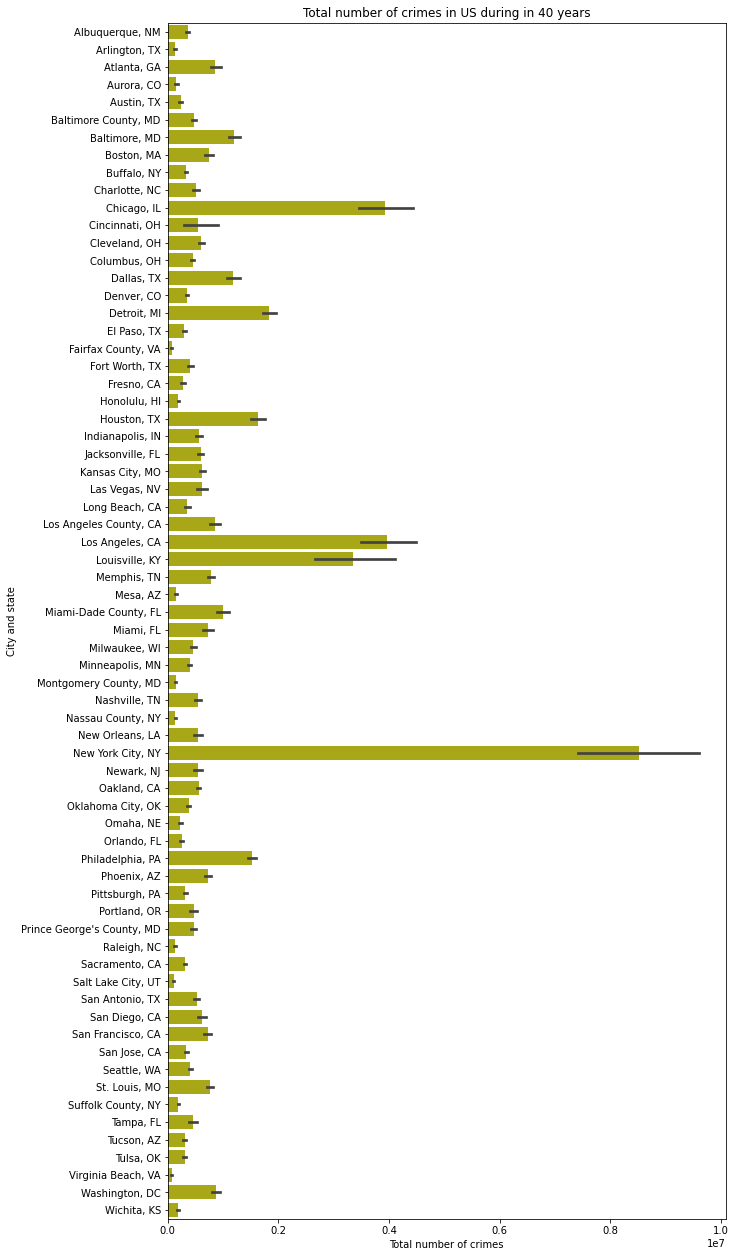

In [22]:
ax=plt.figure(figsize=(10,22))
ax = sns.barplot(df["violent_crimes"]+df["homicides"]+
                 df["rapes"]+df["assaults"]+df["robberies"],                 
                 y=df["agency_jurisdiction"],estimator=sum,color="y")
ax.set_title('Total number of crimes in US during in 40 years')
ax.set(xlabel='Total number of crimes', ylabel='City and state')

There are a couple of things that are interesting here. First of all city "United States" is the sum of them all. 
Further more New York, LA, Chicago seem to be most violent, or is it because of the shere number of citizens in these towns? 
How can we investigate it? Let us creeate a new variable that is relative to the number of citizens, i.e. total number of 
crime divided with total citizens. (NOTE: Black line is simply confidence interval of estimation)

In [23]:
df["relative_crime"]=(df["violent_crimes"]+df["homicides"]+
                 df["rapes"]+df["assaults"]+df["robberies"])/df.population

[Text(0.5, 0, 'Total number of crimes'), Text(0, 0.5, 'City and state')]

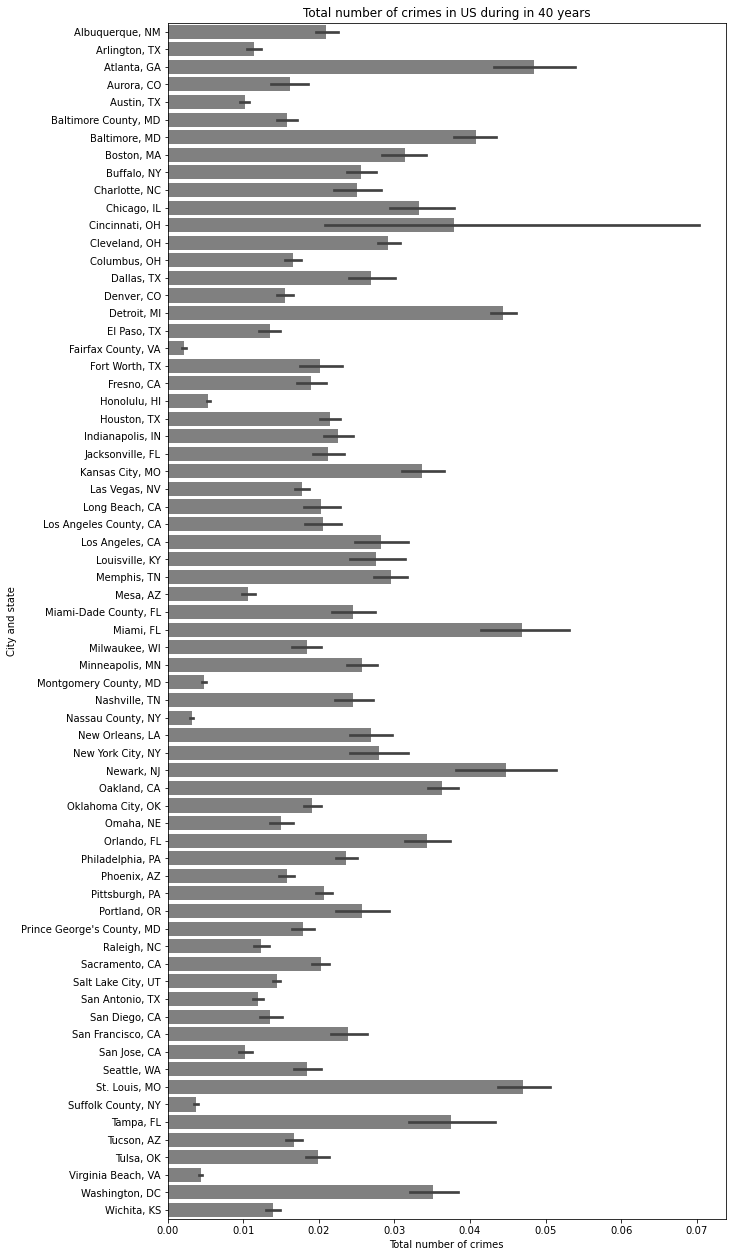

In [24]:
ax=plt.figure(figsize=(10,22))
ax = sns.barplot(x=df["relative_crime"],y=df["agency_jurisdiction"],color="GREY")
ax.set_title('Total number of crimes in US during in 40 years')
ax.set(xlabel='Total number of crimes', ylabel='City and state')


That paints another picture, now top of the list is St.Louis, Atlanta, Miami etc. That was interesting, but was it always like that? What was the number of crimes over the years?

In [25]:
df['crime_over_year'] = (df["violent_crimes"]+df["homicides"]+
                 df["rapes"]+df["assaults"]+df["robberies"])

[Text(0.5, 0, 'Years'), Text(0, 0.5, 'Sum of all crimes')]

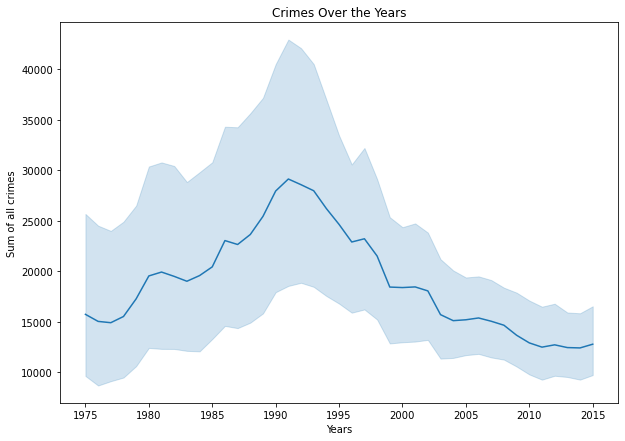

In [26]:
ax=plt.figure(figsize=(10,7))
ax = sns.lineplot(x=df['report_year'], y=df['crime_over_year'])
ax.set_title('Crimes Over the Years')
ax.set(xlabel='Years', ylabel='Sum of all crimes')

Over 30 thousand crimes were committed over the years

From the Graph above we can say the year 1990-1995 had the highest number of crime

## Now lets go deeper and see what crime made 1990-1995 to have the highest number of crimes

#### Homicides

In [27]:
year_range = df[df['report_year'].isin([1990, 1991, 1992, 1993, 1994, 1995])]

In [28]:
df2 = year_range[["agency_jurisdiction","homicides"]]

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Homicides')

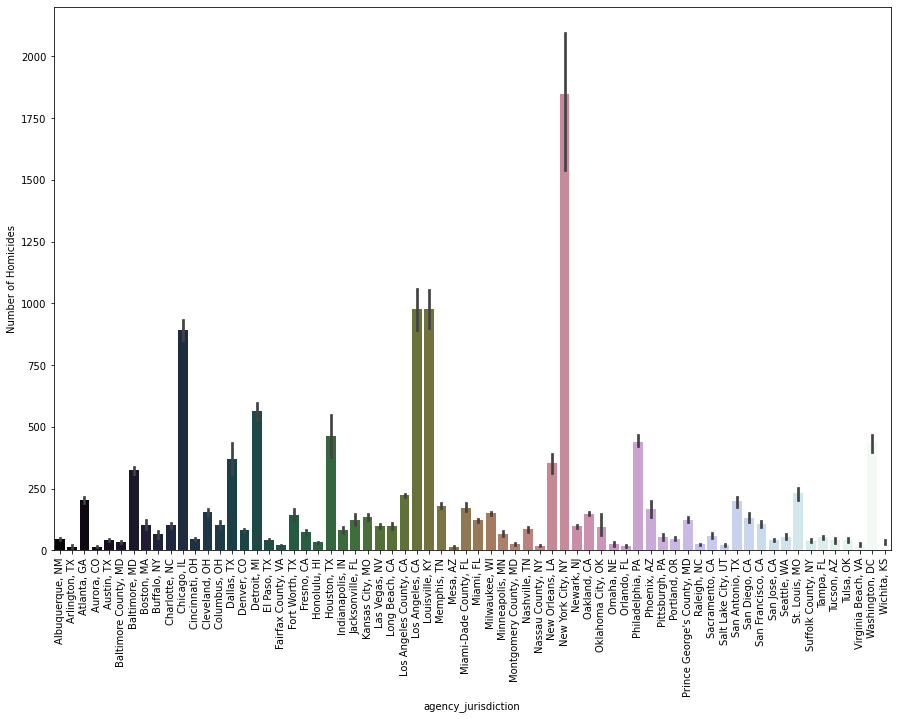

In [29]:
ax=plt.figure(figsize=(15,10))
plt.xticks(rotation='vertical')
ax=sns.barplot(df2["agency_jurisdiction"], df2["homicides"],palette="cubehelix")

plt.ylabel("Number of Homicides")

#### Violent Crimes

In [30]:
year_range = df[df['report_year'].isin([1990, 1991, 1992, 1993, 1994, 1995])]

In [31]:
df2 = year_range[["agency_jurisdiction","violent_crimes"]]

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Violent Crimes')

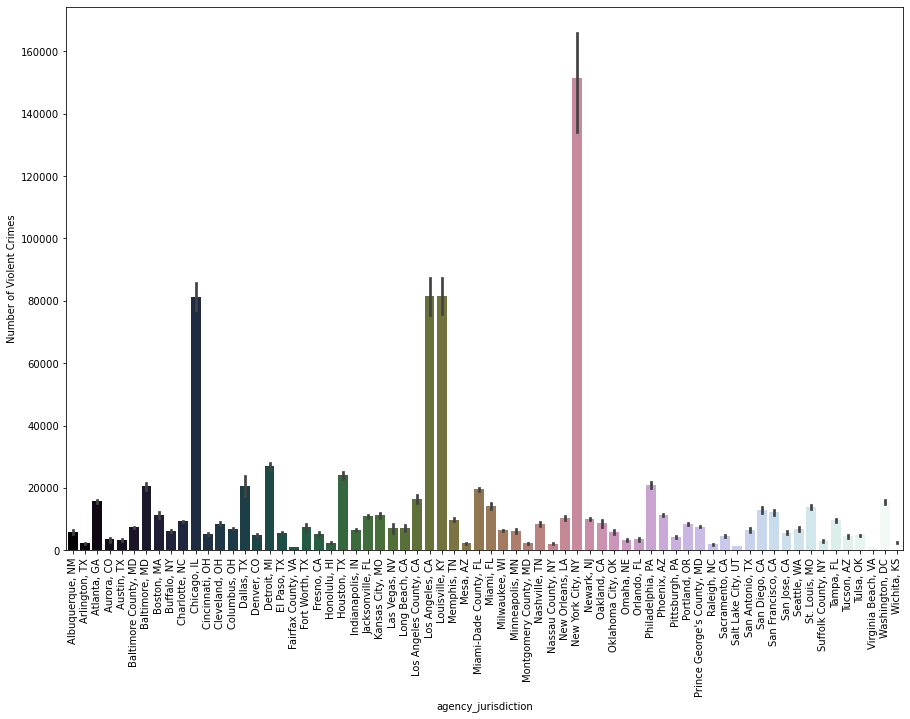

In [32]:
ax=plt.figure(figsize=(15,10))
plt.xticks(rotation='vertical')
ax=sns.barplot(df2["agency_jurisdiction"], df2["violent_crimes"],palette="cubehelix")

plt.ylabel("Number of Violent Crimes")

#### Rape

In [33]:
df2 = year_range[["agency_jurisdiction","rapes"]]

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Rapes')

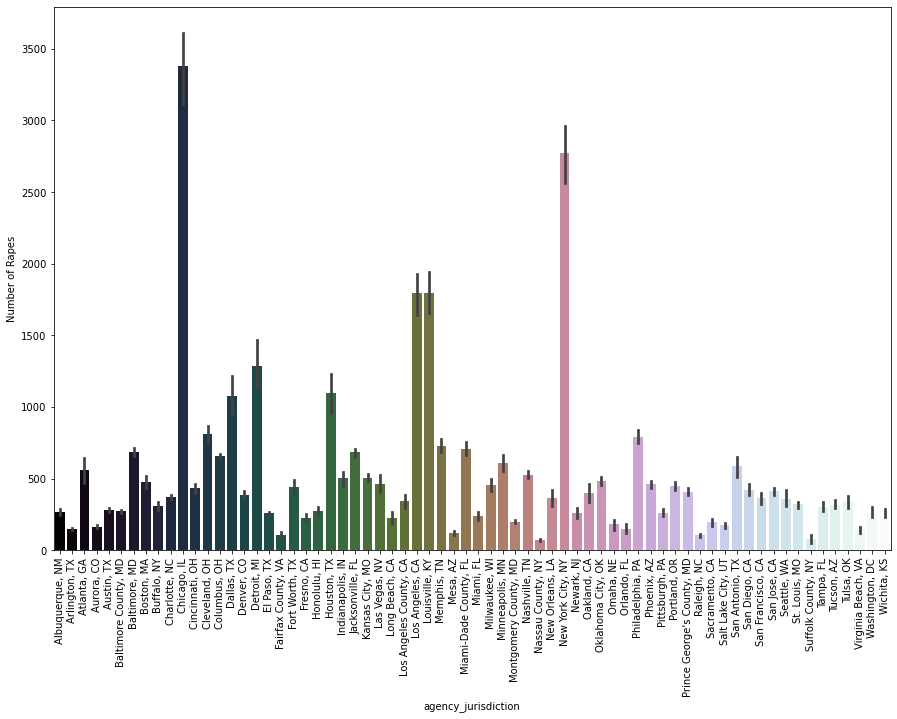

In [34]:
ax=plt.figure(figsize=(15,10))
plt.xticks(rotation='vertical')
ax=sns.barplot(df2["agency_jurisdiction"], df2["rapes"],palette="cubehelix")

plt.ylabel("Number of Rapes")

#### Assault

In [35]:
df2 = year_range[["agency_jurisdiction","assaults"]]

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Assaults')

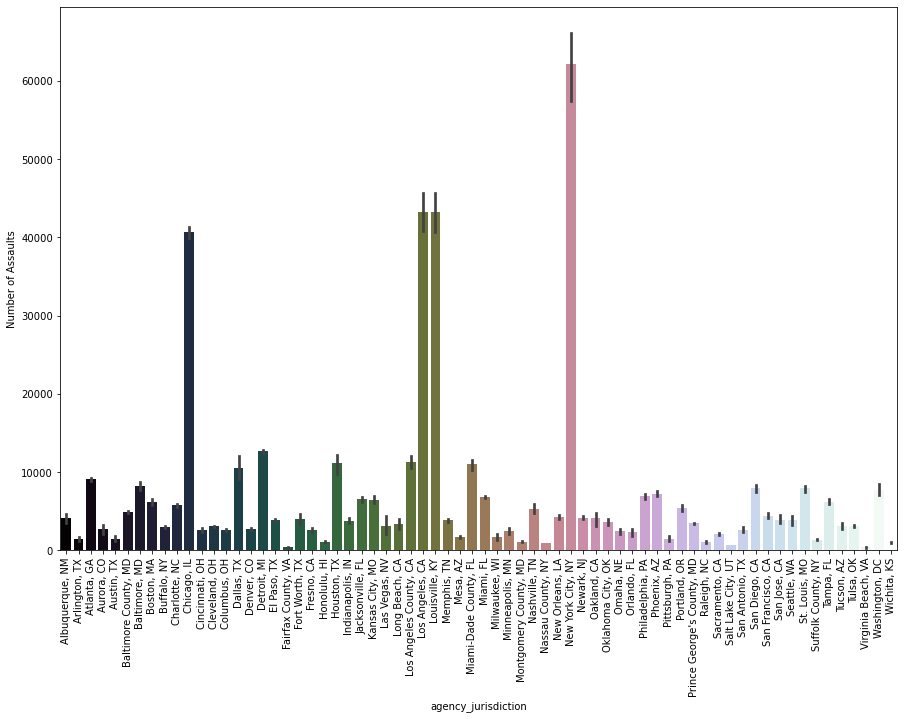

In [36]:
ax=plt.figure(figsize=(15,10))
plt.xticks(rotation='vertical')
ax=sns.barplot(df2["agency_jurisdiction"], df2["assaults"],palette="cubehelix")

plt.ylabel("Number of Assaults")

#### Robberies

In [37]:
df2 = year_range[["agency_jurisdiction","robberies"]]

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Violent Crimes')

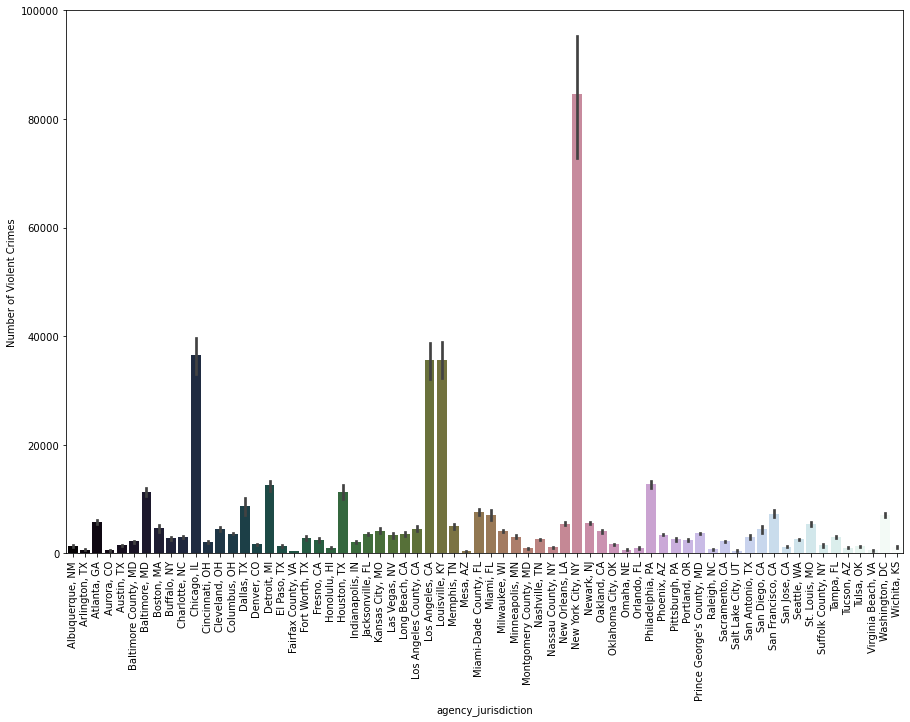

In [38]:
ax=plt.figure(figsize=(15,10))
plt.xticks(rotation='vertical')
ax=sns.barplot(df2["agency_jurisdiction"], df2['robberies'],palette="cubehelix")

plt.ylabel("Number of Violent Crimes")

From the following graphs above it's shows that violent crimes made 1990-1995 to have the highest number of crimes

Also from the 'Total Number of crimes in US' graphs it shows that New York has the highest number of crimes. Let's go into that

In [39]:
NYC = df[df.agency_jurisdiction == 'New York City, NY']

In [40]:
NYC

,report_year,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,relative_crime,crime_over_year
41,1975,"New York City, NY",7422506.0,132182.0,1645.0,3866.0,43481.0,83190.0,0.035617,264364.0
110,1976,"New York City, NY",7530493.0,134153.0,1622.0,3400.0,42948.0,86183.0,0.035629,268306.0
179,1977,"New York City, NY",7481613.0,121916.0,1557.0,3899.0,42056.0,74404.0,0.032591,243832.0
248,1978,"New York City, NY",7242886.0,122685.0,1503.0,3882.0,43271.0,74029.0,0.033877,245370.0
317,1979,"New York City, NY",7109420.0,132383.0,1733.0,3875.0,44203.0,82572.0,0.037242,264766.0
386,1980,"New York City, NY",7035348.0,149549.0,1812.0,3711.0,43476.0,100550.0,0.042514,299098.0
455,1981,"New York City, NY",7070429.0,156946.0,1826.0,3862.0,43783.0,107475.0,0.044395,313892.0
524,1982,"New York City, NY",7096559.0,143943.0,1668.0,3547.0,42784.0,95944.0,0.040567,287886.0
593,1983,"New York City, NY",7100063.0,132653.0,1622.0,3662.0,43326.0,84043.0,0.037367,265306.0
662,1984,"New York City, NY",7167121.0,132292.0,1450.0,3829.0,47472.0,79541.0,0.036916,264584.0


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Homicides')

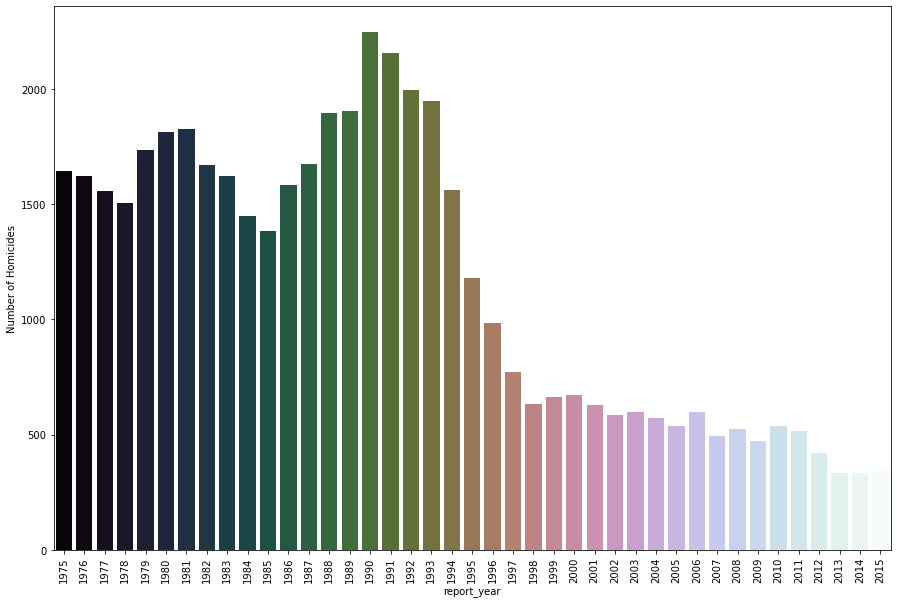

In [41]:
ax=plt.figure(figsize=(15,10))
plt.xticks(rotation='vertical')
ax=sns.barplot(NYC["report_year"], NYC["homicides"],palette="cubehelix")

plt.ylabel("Number of Homicides")

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Rapes')

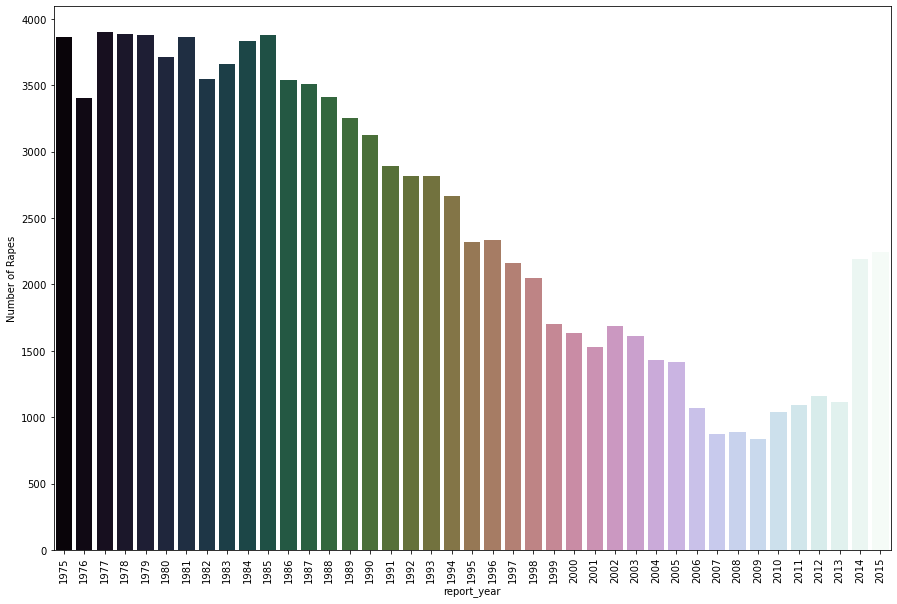

In [42]:
ax=plt.figure(figsize=(15,10))
plt.xticks(rotation='vertical')
sns.barplot(NYC["report_year"], NYC["rapes"],palette="cubehelix")
plt.ylabel("Number of Rapes")

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Assaults')

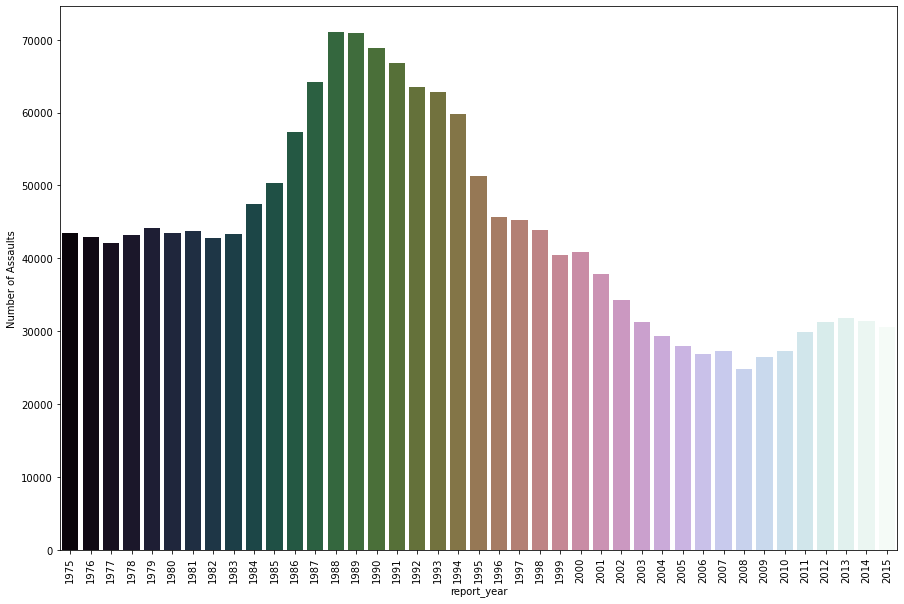

In [43]:
ax=plt.figure(figsize=(15,10))
plt.xticks(rotation='vertical')
sns.barplot(NYC["report_year"], NYC["assaults"],palette="cubehelix")
plt.ylabel("Number of Assaults")

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Robberies')

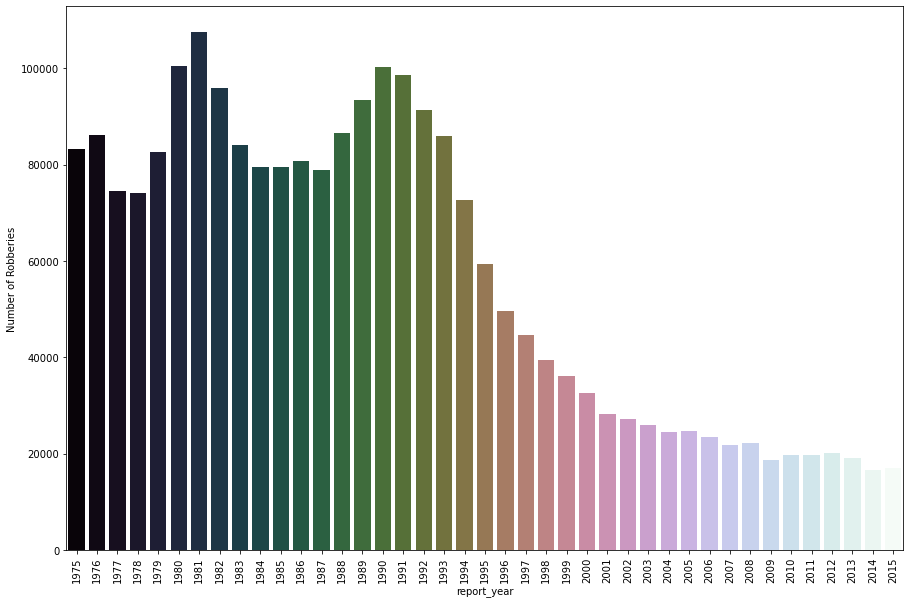

In [44]:
ax=plt.figure(figsize=(15,10))
plt.xticks(rotation='vertical')
sns.barplot(NYC["report_year"], NYC["robberies"],palette="cubehelix")
plt.ylabel("Number of Robberies")

## Correlation between Population and Violent Crimes


<AxesSubplot:title={'center':'Population vs Violent Crimes'}, xlabel='population', ylabel='violent_crimes'>

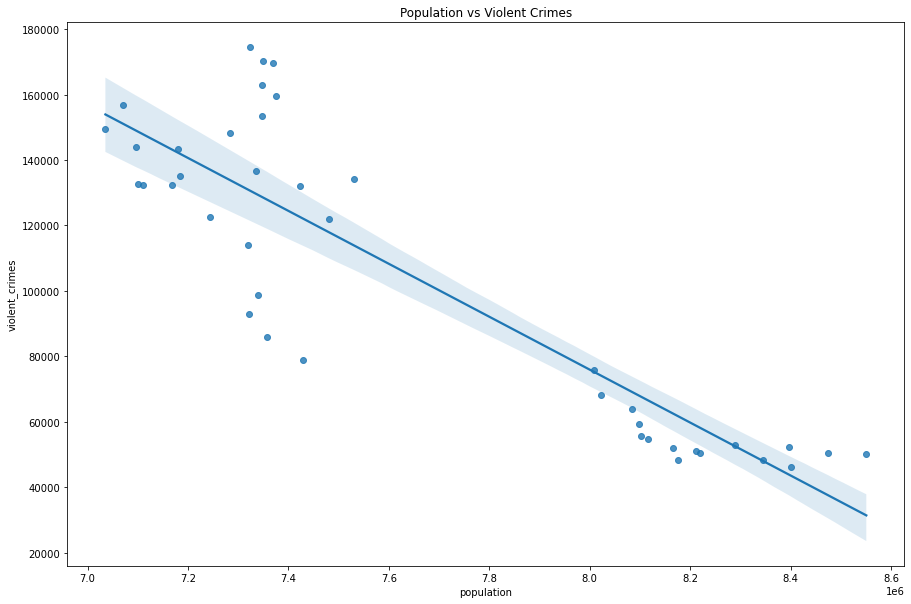

In [45]:
ax=plt.figure(figsize=(15,10))
plt.title('Population vs Violent Crimes')
sns.regplot(x=NYC["population"],
            y=NYC["violent_crimes"])



## Correlation between Population and Homicides

<AxesSubplot:title={'center':'Population vs Homicides'}, xlabel='population', ylabel='homicides'>

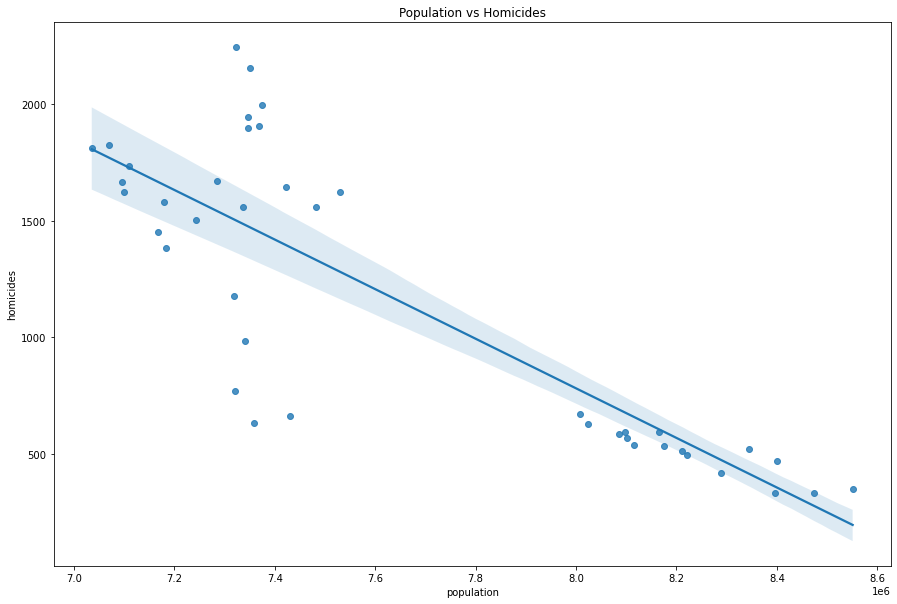

In [46]:
ax=plt.figure(figsize=(15,10))
plt.title('Population vs Homicides')
sns.regplot(x=NYC["population"],
            y=NYC["homicides"])
       

## Correlation between Population and Rapes

<AxesSubplot:title={'center':'Population vs Rapes'}, xlabel='population', ylabel='rapes'>

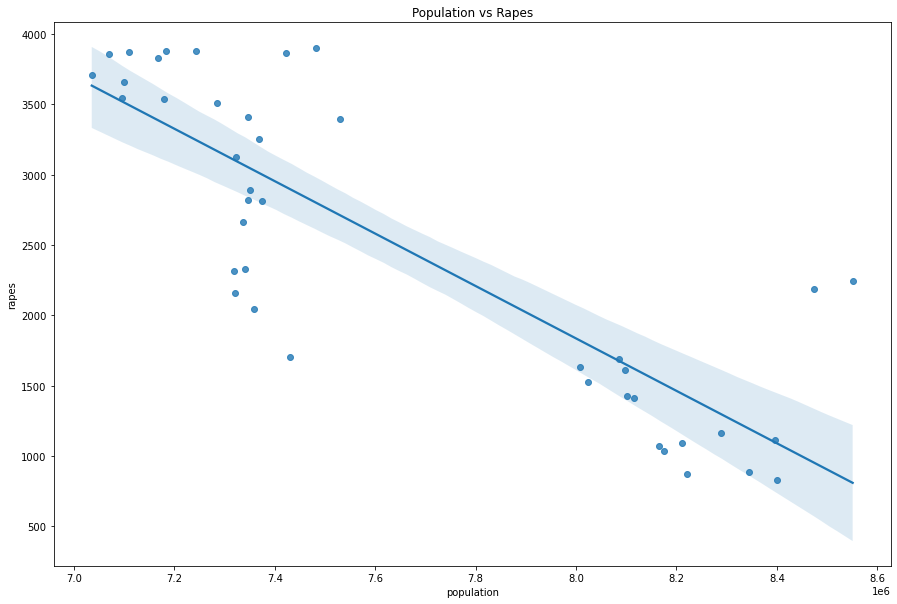

In [47]:
ax=plt.figure(figsize=(15,10))
plt.title('Population vs Rapes')
sns.regplot(x=NYC["population"],
                y=NYC["rapes"])

## Correlation between Population and Assaults

<AxesSubplot:title={'center':'Population vs Assaults'}, xlabel='population', ylabel='assaults'>

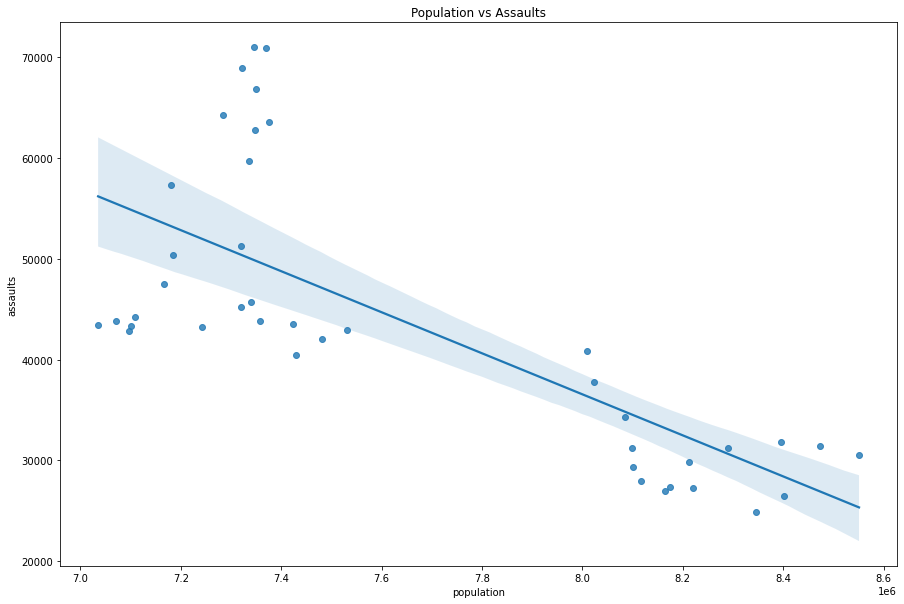

In [48]:
ax=plt.figure(figsize=(15,10))
plt.title('Population vs Assaults')
sns.regplot(x=NYC["population"],
                y=NYC["assaults"])  

## Correlation between Population and Robberies

<AxesSubplot:title={'center':'Population vs Robberies'}, xlabel='population', ylabel='robberies'>

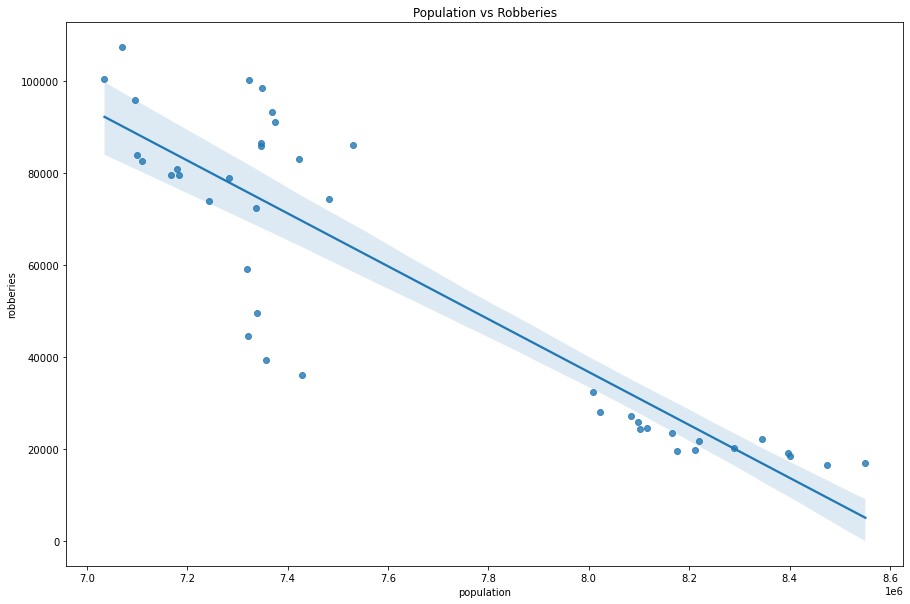

In [49]:
ax=plt.figure(figsize=(15,10))
plt.title('Population vs Robberies')
sns.regplot(x=NYC["population"],
                y=NYC["robberies"])

## Correlation between Violent Crimes and Assaults

<AxesSubplot:title={'center':'Violent Crimes vs Assaults'}, xlabel='violent_crimes', ylabel='assaults'>

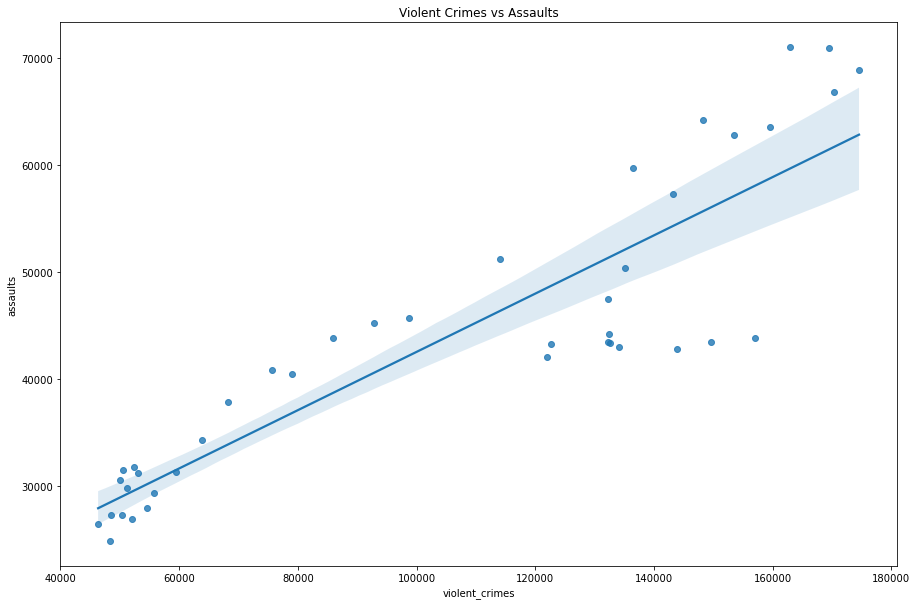

In [50]:
ax=plt.figure(figsize=(15,10))
plt.title('Violent Crimes vs Assaults')
sns.regplot(x=NYC["violent_crimes"],
                y=NYC["assaults"])

## Correlation Between Rapes and Assaults

<AxesSubplot:title={'center':'Rapes vs Assaults'}, xlabel='rapes', ylabel='assaults'>

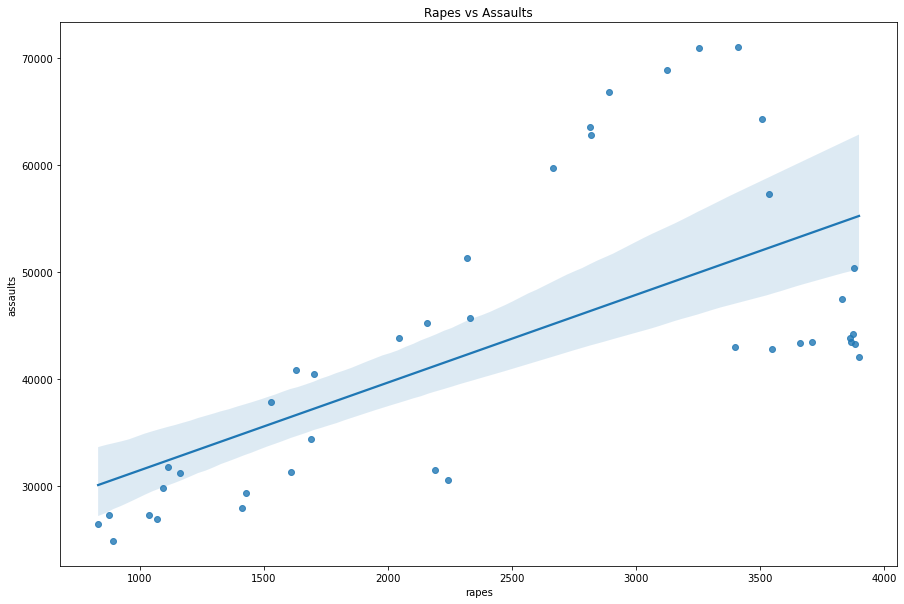

In [51]:
ax=plt.figure(figsize=(15,10))
plt.title('Rapes vs Assaults')
sns.regplot(x=NYC["rapes"],
                y=NYC["assaults"])

### Heatmap Correlation

In [54]:
df3 =df[['violent_crimes',
          'homicides',
          'rapes',
          'assaults',
          'robberies']]

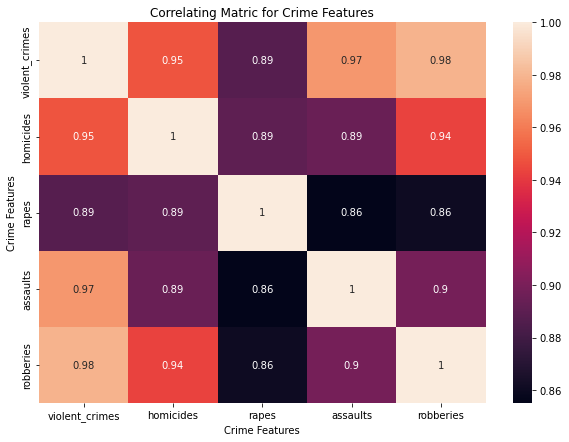

In [63]:
correlation_matrix = df3.corr(method='pearson')
ax=plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlating Matric for Crime Features')
plt.xlabel('Crime Features')
plt.ylabel('Crime Features')

plt.show()

## Correlation Table

In [56]:
df3.corr()

,violent_crimes,homicides,rapes,assaults,robberies
violent_crimes,1.000000,0.948052,0.887852,0.969339,0.978594
homicides,0.948052,1.000000,0.890380,0.894385,0.943384
rapes,0.887852,0.890380,1.000000,0.855100,0.860358
assaults,0.969339,0.894385,0.855100,1.000000,0.898558
robberies,0.978594,0.943384,0.860358,0.898558,1.000000


In [57]:
df_corr = df3.corr()
corr_pairs = df_corr.unstack()
corr_pairs

violent_crimes  violent_crimes    1.000000
                homicides         0.948052
                rapes             0.887852
                assaults          0.969339
                robberies         0.978594
homicides       violent_crimes    0.948052
                homicides         1.000000
                rapes             0.890380
                assaults          0.894385
                robberies         0.943384
rapes           violent_crimes    0.887852
                homicides         0.890380
                rapes             1.000000
                assaults          0.855100
                robberies         0.860358
assaults        violent_crimes    0.969339
                homicides         0.894385
                rapes             0.855100
                assaults          1.000000
                robberies         0.898558
robberies       violent_crimes    0.978594
                homicides         0.943384
                rapes             0.860358
           

In [58]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

assaults        rapes             0.855100
rapes           assaults          0.855100
                robberies         0.860358
robberies       rapes             0.860358
rapes           violent_crimes    0.887852
violent_crimes  rapes             0.887852
homicides       rapes             0.890380
rapes           homicides         0.890380
assaults        homicides         0.894385
homicides       assaults          0.894385
assaults        robberies         0.898558
robberies       assaults          0.898558
homicides       robberies         0.943384
robberies       homicides         0.943384
homicides       violent_crimes    0.948052
violent_crimes  homicides         0.948052
                assaults          0.969339
assaults        violent_crimes    0.969339
robberies       violent_crimes    0.978594
violent_crimes  robberies         0.978594
                violent_crimes    1.000000
rapes           rapes             1.000000
homicides       homicides         1.000000
assaults   

In [59]:
# High Correlation
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

assaults        rapes             0.855100
rapes           assaults          0.855100
                robberies         0.860358
robberies       rapes             0.860358
rapes           violent_crimes    0.887852
violent_crimes  rapes             0.887852
homicides       rapes             0.890380
rapes           homicides         0.890380
assaults        homicides         0.894385
homicides       assaults          0.894385
assaults        robberies         0.898558
robberies       assaults          0.898558
homicides       robberies         0.943384
robberies       homicides         0.943384
homicides       violent_crimes    0.948052
violent_crimes  homicides         0.948052
                assaults          0.969339
assaults        violent_crimes    0.969339
robberies       violent_crimes    0.978594
violent_crimes  robberies         0.978594
                violent_crimes    1.000000
rapes           rapes             1.000000
homicides       homicides         1.000000
assaults   

In [60]:
# Low Correlation
low_corr = sorted_pairs[(sorted_pairs) < 0.5]
low_corr

Series([], dtype: float64)

In [61]:
# Violent crime and Robberies had the highest correlation
# Assault and Rapes had the lowest correlation